<a href="https://colab.research.google.com/github/ViniciusCastillo/Test_Einstein/blob/main/%20notebooks/draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format

In [25]:
df = pd.read_csv('https://github.com/ViniciusCastillo/Teste_Einstein/raw/main/datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   target  10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


In [26]:
df.describe(include='all')

,x1,x2,x3,target
count,"10,000.00","10,000.00","10,000.00",10000
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,low
freq,NaN,NaN,NaN,6000
mean,42.67,9.02,-24.60,NaN
std,25.60,5.18,20.14,NaN
min,-19.50,0.17,-59.98,NaN
25%,21.68,5.26,-41.92,NaN
50%,42.94,8.07,-24.55,NaN
75%,64.13,11.73,-7.08,NaN


In [64]:
df.target.value_counts().to_frame()

,target
low,6000
high,3000
med,1000


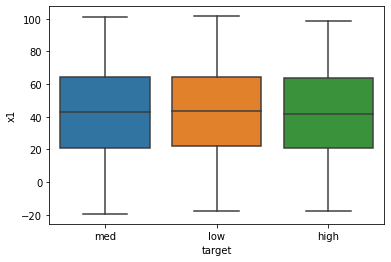

In [28]:
sns.boxplot(y=df['x1'], x=df['target'])

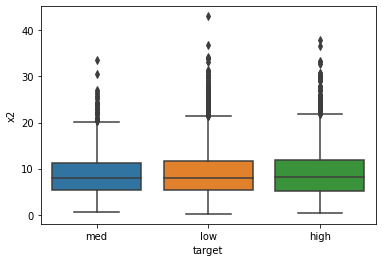

In [29]:
sns.boxplot(y=df['x2'], x=df['target'])

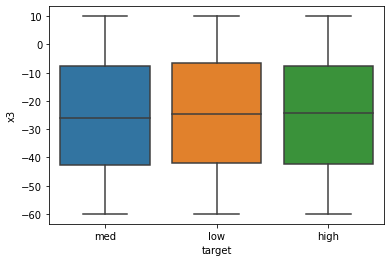

In [30]:
sns.boxplot(y=df['x3'], x=df['target'])

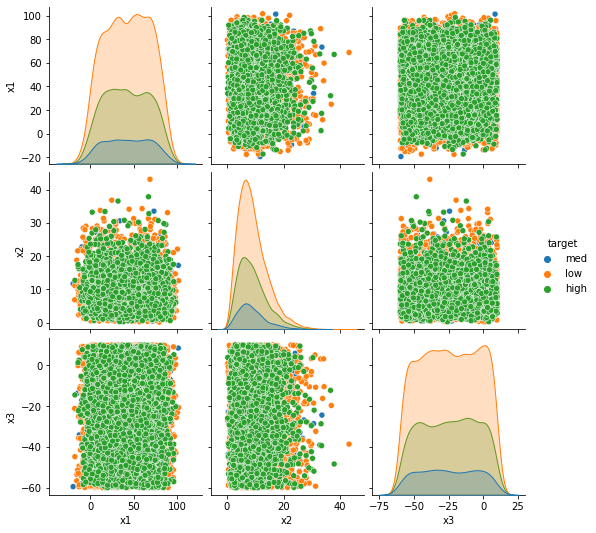

In [31]:
sns.pairplot(df, hue='target')

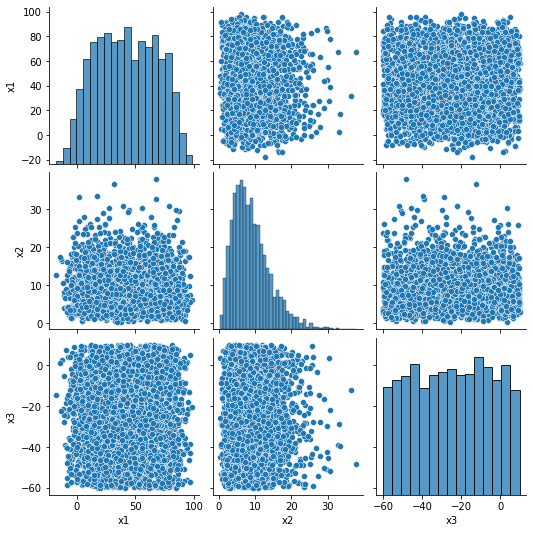

In [32]:
sns.pairplot(df.query('target == "high"'))

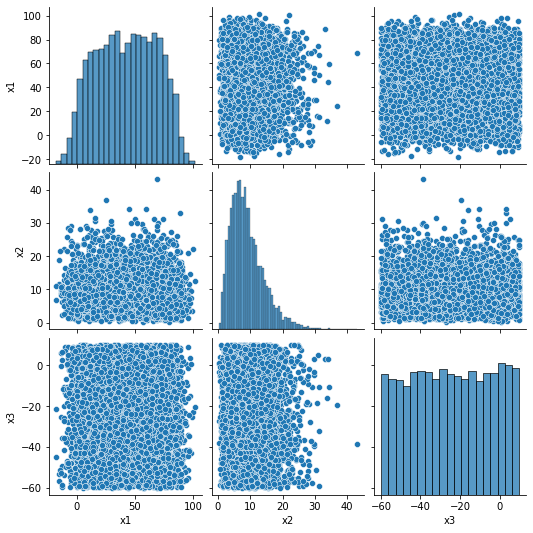

In [33]:
sns.pairplot(df.query('target == "low"'))

In [34]:
df['x13'] = df['x1']/df['x3']
df['x23'] = df['x2']/df['x3']
df['x12'] = df['x1']/df['x2']
df['x1^2'] = df['x1']**2
df['x2^2'] = df['x2']**2
df['x3^2'] = df['x3']**2
df['log(x1-min(x1)+1)'] = (df['x1']-df['x1'].min()+1).transform(np.log)
df['log(x2-min(x2)+1)'] = (df['x2']-df['x2'].min()+1).transform(np.log)
df['log(x3-min(x3)+1)'] = (df['x3']-df['x3'].min()+1).transform(np.log)
df.describe()

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1)
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,42.67,9.02,-24.60,inf,inf,7.23,"2,475.88",108.25,"1,010.84",4.04,2.15,3.34
std,25.60,5.18,20.14,NaN,NaN,10.32,"2,264.39",130.17,"1,065.01",0.49,0.55,0.85
min,-19.50,0.17,-59.98,"-7,408.00",-635.00,-5.56,0.00,0.03,0.00,0.00,0.00,0.00
25%,21.68,5.26,-41.92,-2.47,-0.52,2.34,469.81,27.67,72.42,3.74,1.81,2.95
50%,42.94,8.07,-24.55,-1.20,-0.24,4.92,"1,843.84",65.21,602.95,4.15,2.19,3.60
75%,64.13,11.73,-7.08,-0.35,-0.11,8.85,"4,113.30",137.59,"1,757.29",4.44,2.53,3.99
max,101.52,43.08,9.99,inf,inf,466.24,"10,306.31","1,855.89","3,597.60",4.80,3.78,4.26


In [35]:
df.loc[df['x3'] == 0]

,x1,x2,x3,target,x13,x23,x12,x1^2,x2^2,x3^2,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1)
5372,45.88,11.47,0.00,low,inf,inf,4.00,"2,104.97",131.56,0.00,4.20,2.51,4.11


In [36]:
df.loc[df['x13'] == np.inf, 'x13'] = 0
df.loc[df['x23'] == np.inf, 'x23'] = 0
df.describe()

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1)
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,42.67,9.02,-24.60,-0.87,0.16,7.23,"2,475.88",108.25,"1,010.84",4.04,2.15,3.34
std,25.60,5.18,20.14,167.14,38.51,10.32,"2,264.39",130.17,"1,065.01",0.49,0.55,0.85
min,-19.50,0.17,-59.98,"-7,408.00",-635.00,-5.56,0.00,0.03,0.00,0.00,0.00,0.00
25%,21.68,5.26,-41.92,-2.47,-0.52,2.34,469.81,27.67,72.42,3.74,1.81,2.95
50%,42.94,8.07,-24.55,-1.20,-0.24,4.92,"1,843.84",65.21,602.95,4.15,2.19,3.60
75%,64.13,11.73,-7.08,-0.35,-0.11,8.85,"4,113.30",137.59,"1,757.29",4.44,2.53,3.99
max,101.52,43.08,9.99,"7,429.00","2,619.00",466.24,"10,306.31","1,855.89","3,597.60",4.80,3.78,4.26


In [37]:
df['target_low'] = 0
df.loc[df['target']=="low", 'target_low'] = 1
df['target_high'] = 0
df.loc[df['target']=="high", 'target_high'] = 1
df.describe()

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1),target_low,target_high
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,42.67,9.02,-24.60,-0.87,0.16,7.23,"2,475.88",108.25,"1,010.84",4.04,2.15,3.34,0.60,0.30
std,25.60,5.18,20.14,167.14,38.51,10.32,"2,264.39",130.17,"1,065.01",0.49,0.55,0.85,0.49,0.46
min,-19.50,0.17,-59.98,"-7,408.00",-635.00,-5.56,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00
25%,21.68,5.26,-41.92,-2.47,-0.52,2.34,469.81,27.67,72.42,3.74,1.81,2.95,0.00,0.00
50%,42.94,8.07,-24.55,-1.20,-0.24,4.92,"1,843.84",65.21,602.95,4.15,2.19,3.60,1.00,0.00
75%,64.13,11.73,-7.08,-0.35,-0.11,8.85,"4,113.30",137.59,"1,757.29",4.44,2.53,3.99,1.00,1.00
max,101.52,43.08,9.99,"7,429.00","2,619.00",466.24,"10,306.31","1,855.89","3,597.60",4.80,3.78,4.26,1.00,1.00


In [38]:
df.corr()

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1),target_low,target_high
x1,1.00,-0.01,-0.01,-0.00,0.00,0.43,0.96,-0.01,0.01,0.96,-0.02,-0.01,0.01,-0.01
x2,-0.01,1.00,0.00,0.02,0.04,-0.42,-0.01,0.95,-0.00,-0.02,0.94,0.00,0.00,0.01
x3,-0.01,0.00,1.00,0.01,0.02,-0.00,-0.01,-0.01,-0.94,-0.01,0.01,0.91,0.01,-0.00
x13,-0.00,0.02,0.01,1.00,0.73,-0.00,-0.00,0.02,-0.00,-0.00,0.01,0.00,0.01,-0.01
x23,0.00,0.04,0.02,0.73,1.00,-0.01,0.00,0.04,-0.01,0.01,0.03,0.01,-0.00,-0.01
x12,0.43,-0.42,-0.00,-0.00,-0.01,1.00,0.42,-0.30,-0.00,0.41,-0.56,0.00,0.01,-0.01
x1^2,0.96,-0.01,-0.01,-0.00,0.00,0.42,1.00,-0.00,0.01,0.85,-0.01,-0.01,0.01,-0.01
x2^2,-0.01,0.95,-0.01,0.02,0.04,-0.30,-0.00,1.00,0.00,-0.02,0.79,-0.00,0.00,0.01
x3^2,0.01,-0.00,-0.94,-0.00,-0.01,-0.00,0.01,0.00,1.00,0.01,-0.01,-0.98,-0.00,-0.01
log(x1-min(x1)+1),0.96,-0.02,-0.01,-0.00,0.01,0.41,0.85,-0.02,0.01,1.00,-0.02,-0.00,0.01,-0.01


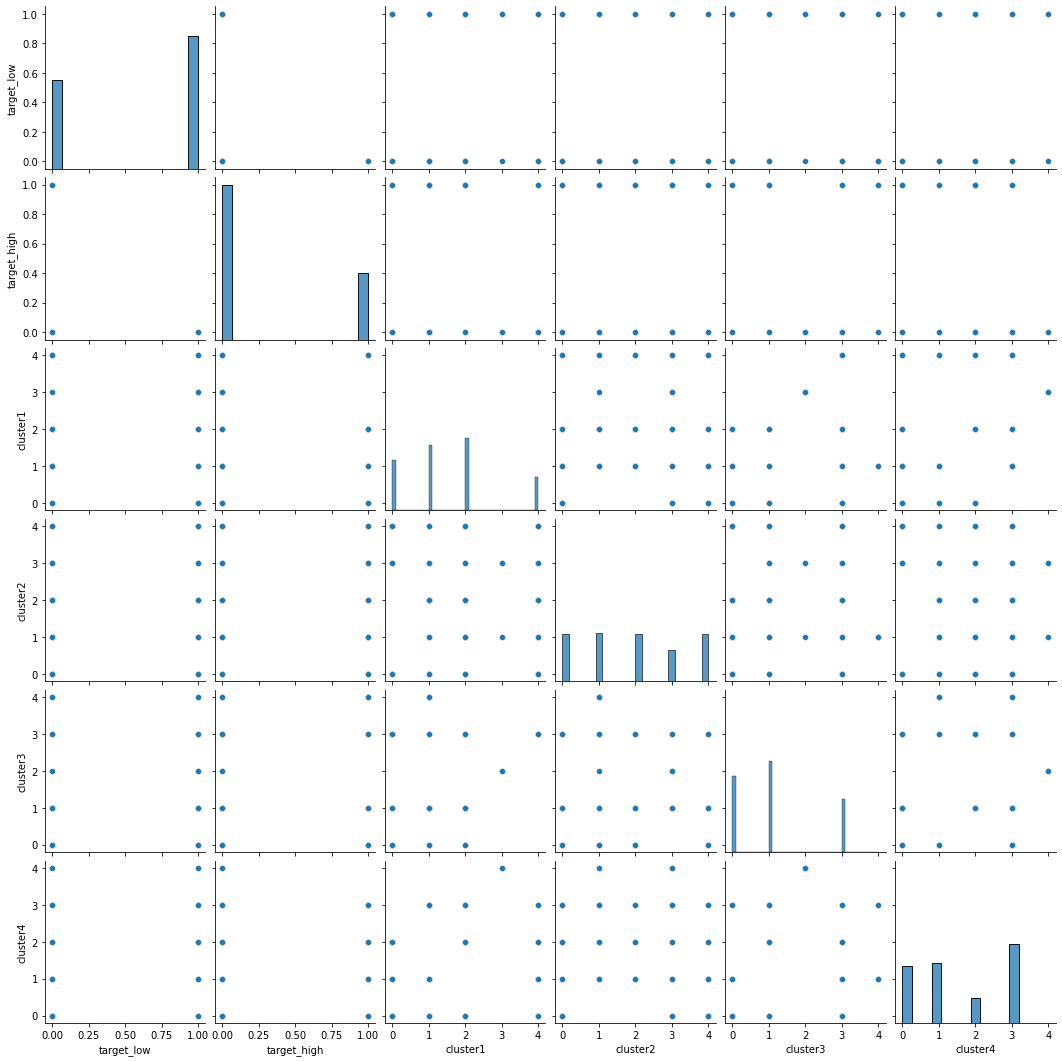

In [54]:
features = ['x1','x2','x3','x13','x23','x12','x1^2','x2^2','x3^2','log(x1-min(x1)+1)','log(x2-min(x2)+1)','log(x3-min(x3)+1)']
df[features] = StandardScaler().fit_transform(df[features])
kmeans=KMeans(n_init=50, n_clusters=5)

df['cluster1']=kmeans.fit_predict(df[features])

features_c2 = ['x1','x2','x3']
df['cluster2']=kmeans.fit_predict(df[features_c2])

features_c3 = ['x1','x2','x3','x13','x23','x12']
df['cluster3']=kmeans.fit_predict(df[features_c3])

features_c4 = ['x1','x2','x3','x23','x12','x1^2','x2^2','x3^2']
df['cluster4']=kmeans.fit_predict(df[features_c4])

sns.pairplot(df[['target_low','target_high','cluster1','cluster2','cluster3','cluster4']])

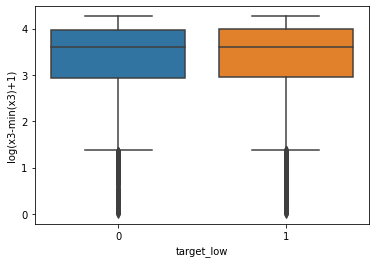

In [ ]:
sns.boxplot(y=df['log(x3-min(x3)+1)'], x=df['target_low'])

In [91]:
df['bin_x3'] = pd.cut(df['x3'], bins=[df['x3'].min(),df['x3'].quantile(0.2),df['x3'].quantile(0.4),df['x3'].quantile(0.6),df['x3'].quantile(0.8),df['x3'].max()], labels=False)
df['bin_x2'] = pd.cut(df['x2'], bins=[df['x2'].min(),df['x2'].quantile(0.2),df['x2'].quantile(0.4),df['x2'].quantile(0.6),df['x2'].quantile(0.8),df['x2'].max()], labels=False)
df['bin_x1'] = pd.cut(df['x1'], bins=[df['x1'].min(),df['x1'].quantile(0.2),df['x1'].quantile(0.4),df['x1'].quantile(0.6),df['x1'].quantile(0.8),df['x1'].max()], labels=False)

In [ ]:
df.pivot_table(index='bin_x1', columns='target', values='x1',aggfunc='count')

target,high,low,med
bin_x1,,,
0.00,594,1202,203
1.00,628,1169,203
2.00,601,1205,194
3.00,596,1213,191
4.00,581,1211,208


In [ ]:
df.pivot_table(index='bin_x2', columns='target', values='x1',aggfunc='count')

target,high,low,med
bin_x2,,,
0.00,608,1196,197
1.00,591,1204,206
2.00,579,1205,213
3.00,617,1175,209
4.00,605,1219,175


In [ ]:
df.pivot_table(index='bin_x3', columns='target', values='x1',aggfunc='count')

target,high,low,med
bin_x3,,,
0.00,597,1189,212
1.00,584,1206,210
2.00,619,1192,190
3.00,632,1173,196
4.00,568,1239,191


In [ ]:
df.corr()

,x1,x2,x3,target_low,target_high,x13,x23,log(x3-min(x3)+1),x12,log(x1-min(x1)+1),log(x2-min(x2)+1),bin_x3,bin_x2,bin_x1
x1,1.00,-0.01,-0.01,0.01,-0.01,-0.00,0.00,-0.01,0.43,0.96,-0.02,-0.01,-0.01,0.97
x2,-0.01,1.00,0.00,0.00,0.01,0.02,0.04,0.00,-0.42,-0.02,0.94,0.00,0.90,-0.01
x3,-0.01,0.00,1.00,0.01,-0.00,0.01,0.02,0.91,-0.00,-0.01,0.01,0.98,0.01,-0.01
target_low,0.01,0.00,0.01,1.00,-0.80,0.01,-0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01
target_high,-0.01,0.01,-0.00,-0.80,1.00,-0.01,-0.01,0.01,-0.01,-0.01,0.01,-0.00,0.00,-0.01
x13,-0.00,0.02,0.01,0.01,-0.01,1.00,0.73,0.00,-0.00,-0.00,0.01,0.01,0.02,-0.01
x23,0.00,0.04,0.02,-0.00,-0.01,0.73,1.00,0.01,-0.01,0.01,0.03,0.02,0.02,0.00
log(x3-min(x3)+1),-0.01,0.00,0.91,0.00,0.01,0.00,0.01,1.00,0.00,-0.00,0.01,0.88,0.01,-0.01
x12,0.43,-0.42,-0.00,0.01,-0.01,-0.00,-0.01,0.00,1.00,0.41,-0.56,-0.00,-0.48,0.42
log(x1-min(x1)+1),0.96,-0.02,-0.01,0.01,-0.01,-0.00,0.01,-0.00,0.41,1.00,-0.02,-0.01,-0.02,0.92


In [17]:
features
randomForest=RandomForestClassifier()
df['cluster']=kmeans.fit_predict(df[['x1','x2','x3','x13','x23','x12']])

In [56]:
features.extend(['cluster1','cluster2','cluster3','cluster4'])
features

['x1',
 'x2',
 'x3',
 'x13',
 'x23',
 'x12',
 'x1^2',
 'x2^2',
 'x3^2',
 'log(x1-min(x1)+1)',
 'log(x2-min(x2)+1)',
 'log(x3-min(x3)+1)',
 'cluster1',
 'cluster2',
 'cluster3',
 'cluster4']

In [109]:
df['x1^3'] = df['x1']**3
df['x2^3'] = df['x2']**3
df['x3^3'] = df['x3']**3
features = ['x1','x2','x3','x13','x23','x12','x1^2','x2^2','x3^2','x1^3','x2^3','x3^3','log(x1-min(x1)+1)','log(x2-min(x2)+1)','log(x3-min(x3)+1)']
df[features] = StandardScaler().fit_transform(df[features])

X_train, X_test, y_train, y_test = train_test_split(df[features], df['target'], stratify=df['target'], random_state=2134)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['target'], stratify=df['target'], random_state=2134)

In [63]:
y_train.value_counts().to_frame()

,target
low,4500
high,2250
med,750


In [67]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)
for feature in zip(features, rfc.feature_importances_):
    print(feature)

('x1', 0.07945196263312457)
('x2', 0.07661415605843658)
('x3', 0.07925226028836127)
('x13', 0.08958053673132121)
('x23', 0.09123346723263075)
('x12', 0.09119715662976788)
('x1^2', 0.08116230630297659)
('x2^2', 0.07682614860229853)
('x3^2', 0.07930906798629865)
('log(x1-min(x1)+1)', 0.07976745499322703)
('log(x2-min(x2)+1)', 0.07677953768039092)
('log(x3-min(x3)+1)', 0.07922353967115348)
('cluster1', 0.004869721725006644)
('cluster2', 0.005515164434508703)
('cluster3', 0.004067011628505896)
('cluster4', 0.005150507401991209)


In [108]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)
for feature in zip(features, rfc.feature_importances_):
    print(feature)

('x1', 0.06408065363473321)
('x2', 0.061024513682378025)
('x3', 0.06302215207195218)
('x13', 0.07529690543252739)
('x23', 0.07664989328979467)
('x12', 0.07681710192580724)
('x1^2', 0.06512548512991875)
('x2^2', 0.061053000780464925)
('x3^2', 0.06353460410367452)
('x1^3', 0.06375699031189942)
('x2^3', 0.06119282296579951)
('x3^3', 0.06243347945623545)
('log(x1-min(x1)+1)', 0.06331241468152872)
('log(x2-min(x2)+1)', 0.06122561074053496)
('log(x3-min(x3)+1)', 0.06275178702497464)
('bin_x1', 0.005890092517578113)
('bin_x2', 0.0070775749979563275)
('bin_x3', 0.0057549172522419504)


In [110]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)
for feature in zip(features, rfc.feature_importances_):
    print(feature)

('x1', 0.06554763549813303)
('x2', 0.06303330043046167)
('x3', 0.06395883965656929)
('x13', 0.07526884543330029)
('x23', 0.07614864006597943)
('x12', 0.07641095946566906)
('x1^2', 0.0664007796279374)
('x2^2', 0.06317373783592774)
('x3^2', 0.06507091852757439)
('x1^3', 0.06509244458046116)
('x2^3', 0.06255957886777738)
('x3^3', 0.06476462759487732)
('log(x1-min(x1)+1)', 0.06528862865475686)
('log(x2-min(x2)+1)', 0.06286920929209928)
('log(x3-min(x3)+1)', 0.06441185446847567)


In [103]:
X_train.loc[X_train.bin_x3.isnull() == True]

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,x1^3,x2^3,x3^3,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1),bin_x1,bin_x2,bin_x3
968,-0.91,-0.42,-1.76,0.00,-0.01,-0.43,-0.93,-0.47,2.43,-0.33,-0.16,-2.74,-0.73,-0.20,-3.92,1.00,1.00,NaN
3366,1.02,0.13,-1.76,-0.00,-0.01,-0.01,1.00,-0.11,2.43,0.49,-0.15,-2.74,0.92,0.38,-3.92,4.00,3.00,NaN


In [104]:
X_train.loc[X_train.bin_x2.isnull() == True]

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,x1^3,x2^3,x3^3,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1),bin_x1,bin_x2,bin_x3
2241,1.43,-1.71,1.26,0.58,0.00,44.48,1.68,-0.83,-0.95,1.31,-0.82,1.03,1.14,-3.94,0.92,4.00,NaN,4.00


In [105]:
X_train.loc[X_train.bin_x1.isnull() == True]

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,x1^3,x2^3,x3^3,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1),bin_x1,bin_x2,bin_x3
431,-2.43,0.51,-1.73,0.01,-0.01,-0.86,-0.93,0.22,2.37,-6.38,-0.13,-2.62,-8.25,0.69,-3.44,NaN,3.00,0.00


In [107]:
X_train = X_train.replace(np.nan, 0)
X_train.describe()

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,x1^3,x2^3,x3^3,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1),bin_x1,bin_x2,bin_x3
count,"7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00"
mean,-0.01,0.00,0.00,-0.02,-0.01,-0.00,-0.01,0.00,0.00,-0.01,-0.00,0.00,-0.01,0.00,-0.00,1.99,2.01,2.00
std,1.00,1.00,1.00,0.82,0.91,1.02,1.00,1.00,1.00,1.00,1.01,1.01,1.00,1.00,1.00,1.42,1.41,1.42
min,-2.43,-1.71,-1.76,-44.32,-16.49,-1.24,-1.09,-0.83,-0.95,-6.38,-0.82,-2.74,-8.25,-3.94,-3.92,0.00,0.00,0.00
25%,-0.83,-0.72,-0.87,-0.01,-0.02,-0.48,-0.89,-0.62,-0.88,-0.24,-0.20,-0.32,-0.62,-0.62,-0.47,1.00,1.00,1.00
50%,-0.00,-0.18,0.00,-0.00,-0.01,-0.23,-0.29,-0.33,-0.38,0.01,-0.15,0.01,0.21,0.07,0.30,2.00,2.00,2.00
75%,0.83,0.52,0.88,0.00,-0.01,0.15,0.71,0.23,0.71,0.27,-0.13,0.35,0.80,0.70,0.76,3.00,3.00,3.00
max,2.30,6.57,1.72,15.75,68.00,44.48,3.46,13.43,2.43,5.43,38.02,2.58,1.55,2.99,1.08,4.00,4.00,4.00


In [112]:
X_train.corr()

,x1,x2,x3,x13,x23,x12,x1^2,x2^2,x3^2,x1^3,x2^3,x3^3,log(x1-min(x1)+1),log(x2-min(x2)+1),log(x3-min(x3)+1)
x1,1.00,-0.02,-0.01,-0.02,-0.01,0.42,0.96,-0.01,0.01,0.88,0.00,-0.01,0.96,-0.02,-0.01
x2,-0.02,1.00,-0.00,0.02,0.04,-0.41,-0.01,0.95,0.00,-0.02,0.62,-0.00,-0.02,0.94,-0.00
x3,-0.01,-0.00,1.00,-0.01,0.01,-0.00,-0.01,-0.01,-0.94,-0.01,-0.01,0.92,-0.01,0.01,0.91
x13,-0.02,0.02,-0.01,1.00,0.60,-0.01,-0.02,0.03,0.02,-0.01,0.02,-0.00,-0.02,0.02,-0.01
x23,-0.01,0.04,0.01,0.60,1.00,-0.01,-0.01,0.05,-0.00,0.00,0.05,0.01,-0.00,0.02,0.00
x12,0.42,-0.41,-0.00,-0.01,-0.01,1.00,0.40,-0.29,-0.00,0.37,-0.16,-0.01,0.40,-0.55,0.00
x1^2,0.96,-0.01,-0.01,-0.02,-0.01,0.40,1.00,0.00,0.01,0.83,0.01,-0.01,0.85,-0.01,-0.01
x2^2,-0.01,0.95,-0.01,0.03,0.05,-0.29,0.00,1.00,0.01,-0.02,0.80,-0.01,-0.02,0.79,-0.01
x3^2,0.01,0.00,-0.94,0.02,-0.00,-0.00,0.01,0.01,1.00,0.00,0.01,-0.87,0.00,-0.00,-0.98
x1^3,0.88,-0.02,-0.01,-0.01,0.00,0.37,0.83,-0.02,0.00,1.00,-0.00,-0.01,0.90,-0.03,-0.00


In [127]:
class remove_corr(BaseEstimator, TransformerMixin):
  """
  ________________________________________________________________________________________________________________
  Seleciona os dados com base na correlação deles entre si (dentro do X) e com a variável objetivo (y)
  ________________________________________________________________________________________________________________
  PARAMETROS
  ----------
  corr_maxima: float
      define o máximo valor permitido para as correlações entre as variávies de X, acima disso as variáveris X
      serão desconsideradas (mantendo apenas uma entre as duas que tem alta correlação entre si)

  corr_minima: float
      define o valor minimo para a correlação entre o y e as variaveis de X, abaixo disso as variaves de X 
      serão eliminadas
  ________________________________________________________________________________________________________________
  ATRIBUTOS
  ---------
  excluir: list
      Lista das colunas/variáveris a serem excluidas do X, criado pelo método fit()

  """
  def __init__( self, corr_maxima = 0.95):
    self.corr_maxima = corr_maxima

  def fit( self, X, y):
    """
    ________________________________________________________________________________________________________________
    faz o fit do modelo, salvando uma lista de colunas/variáveris a serem excluidas do X
    ________________________________________________________________________________________________________________
    ENTRADAS
    ----------
    X: DataFrame
        a base das variáveis utilizadas para tentar definir o y

    y: Series
        a variável objetivo que buscamos prever
    ________________________________________________________________________________________________________________
    SAIDA
    -----
    objeto da classe remove_corr
        modelo de seleção já configurado aguardando a utilização do método transform()
        
    """
    corr = X.corr().abs()
    corr_diagonal = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    self.excluir = [coluna for coluna in corr_diagonal.columns if any(corr_diagonal[coluna] > self.corr_maxima)]
    X_ = X.drop(self.excluir, axis=1)

    return self 
    
  def transform(self, X, y = None):
    """
    ________________________________________________________________________________________________________________
    remove as colunas/variáveis definidas pelo método fit() do DataFrame X passado
    ________________________________________________________________________________________________________________
    ENTRADAS
    ----------
    X: DataFrame
        a base das variáveis utilizadas para tentar encontrar definir o y que será transformada

    y: Series
        a variável objetivo que buscamos prever. 
        Não será utilizada e não precisa ser passada.
    ________________________________________________________________________________________________________________
    SAIDA
    -----
    DataFrame
        novo DataFrame do X após a exclusão das colunas/variáveis definidas no fit()
        
    """
    X = X.drop(self.excluir, axis=1)
    return X

In [133]:
rc = remove_corr(corr_maxima=.9)
rc.fit(X_train, y_train)
X_train_ = rc.transform(X_train)
X_train_.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,x1,x2,x3,x13,x23,x12,x1^3,x2^3
x1,1.00,-0.02,-0.01,-0.02,-0.01,0.42,0.88,0.00
x2,-0.02,1.00,-0.00,0.02,0.04,-0.41,-0.02,0.62
x3,-0.01,-0.00,1.00,-0.01,0.01,-0.00,-0.01,-0.01
x13,-0.02,0.02,-0.01,1.00,0.60,-0.01,-0.01,0.02
x23,-0.01,0.04,0.01,0.60,1.00,-0.01,0.00,0.05
x12,0.42,-0.41,-0.00,-0.01,-0.01,1.00,0.37,-0.16
x1^3,0.88,-0.02,-0.01,-0.01,0.00,0.37,1.00,-0.00
x2^3,0.00,0.62,-0.01,0.02,0.05,-0.16,-0.00,1.00


In [134]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train_, y_train)
for feature in zip(X_train_.columns, rfc.feature_importances_):
    print(feature)

('x1', 0.12233363291366924)
('x2', 0.1185828560433857)
('x3', 0.13000879004315347)
('x13', 0.12865298315583504)
('x23', 0.13011050485365583)
('x12', 0.12911845151622534)
('x1^3', 0.1227653159590413)
('x2^3', 0.11842746551503416)


ter um modelo de referencia (dumies)

precisa equilibrar a base